In [12]:
import numpy as np
import pandas as pd
import sklearn as skl
from quant_tools import portfolio_optimization as opt, performance_analysis as pt, data_preprocessing as dp
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [2]:
tickers = pd.read_csv(r'C:\Users\marcu\Documents\Quant\Programming\Data\sp500-master\sp500.csv').iloc[:, 0].head(100).values
tickers

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP',
       'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO',
       'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX',
       'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK',
       'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO',
       'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX',
       'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC',
       'CNP', 'CDAY'], dtype=object)

In [3]:
# Close Prices
close_asset_prices = pd.DataFrame()

# Returns of opening prices
open_asset_returns = pd.DataFrame()

# Returns of close prices
close_asset_returns = pd.DataFrame()

# True Ranges of Prices
true_ranges = pd.DataFrame()

tickers = ['GLD', 'SPY', 'BIL', 'TLT', 'HYG', 'VNQ']

for ticker in tickers:

    prices = yf.download(ticker, start='2000-01-01', end=dt.date.today())
    
    # Get i'th asset's returns
    close_prices = prices['Adj Close'].dropna()
    close_prices = close_prices.rename(ticker)
    close_rets = prices['Adj Close'].pct_change().dropna()
    close_rets = close_rets.rename(ticker)
    open_rets = prices['Open'].pct_change().dropna()
    open_rets = open_rets.rename(ticker)
    tmp_true_range = dp.true_range(prices) # ta.atr(high=prices['High'], low=prices['Low'], close=prices['Adj Close'], length=20)
    tmp_true_range = tmp_true_range.rename(ticker)

    close_asset_prices = pd.concat([close_asset_prices, close_prices, ], axis=1)
    close_asset_returns = pd.concat([close_asset_returns, close_rets], axis=1)
    open_asset_returns = pd.concat([open_asset_returns, open_rets], axis=1)
    true_ranges = pd.concat([true_ranges, tmp_true_range], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Create atr risk parity optimization functions

In [4]:
portfolio_value = 100000

In [5]:
n = close_asset_prices.columns.size
sd2_pct_move = .05
sd2_VaR = sd2_pct_move / n
sd1_VaR = sd2_VaR / 2

In [6]:
full_portfolio_w = pd.DataFrame(index=close_asset_returns.index)
full_portfolio_w_risk_parity = pd.DataFrame(index=close_asset_returns.index)
portfolio_w = {}
risk_parity_w = {}
rebal_freq = 5
lookback_window = 60

for date in close_asset_returns.index[::rebal_freq]:

    portfolio_w[date] = opt.atr_risk_parity(prices = close_asset_prices.loc[:date], true_ranges=true_ranges.loc[:date], lookback_window=10, target_risk = sd1_VaR, portfoio_value = portfolio_value, long_only=True)
    risk_parity_w[date] = opt.risk_parity(returns = close_asset_prices.loc[:date], long_only=True)

Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contr

c:\Users\marcu\Documents\Quant\Programming\quant_tools\portfolio_optimization.py:183: RuntimeWarning: invalid value encountered in true_divide
  risk_contribution = weighted_true_range_risk_contribution / portfolio_true_range_risk


Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: 2500.0000000000005
Ex-Ante True Range Risk Contributions: 
GLD    1022.363220
SPY     951.070669
BIL    1177.268608
TLT    1017.053951
HYG     967.226725
VNQ     971.776917
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: 2500.0
Ex-Ante True Range Risk Contributions: 
GLD    1020.620638
SPY    1020.617324
BIL    1020.618182
TLT    1020.626906
HYG    1020.620735
VNQ    1020.620573
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: 2500.0
Ex-Ante True Range Risk Contributions: 
GLD    1020.620406
SPY    1020.620616
BIL    1020.622227
TLT    1020.620808
HYG    1020.620467
VNQ    1020.619833
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: 2500.0000000000005
Ex-Ante True Range Risk Contributions: 
GLD    1020.647896
SPY    1020.623546
BIL    1020.597171
TLT    1020.613404
HYG    1020.579909
VNQ    1020.662429
dtype: float64
Target Portfolio Risk: 2

In [7]:
full_portfolio_w = pd.concat([full_portfolio_w, pd.DataFrame(portfolio_w).T.dropna()], axis=1).ffill()
full_portfolio_w = full_portfolio_w.apply(lambda w: w / w.sum(), axis=1)
full_portfolio_w.dropna(inplace=True)

full_portfolio_w_risk_parity = pd.concat([full_portfolio_w_risk_parity, pd.DataFrame(risk_parity_w).T.dropna()], axis=1).ffill()
full_portfolio_w_risk_parity.dropna(inplace=True)

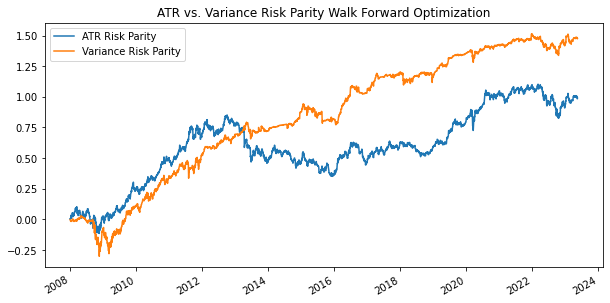

In [11]:
# Get weighted returns & scale based on pct notional exposure
raw_rets = dp.scale_vol((close_asset_returns.shift(-1)*full_portfolio_w).sum(1).dropna().loc[dt.date(2008, 1, 1):])
raw_rets.rename('ATR Risk Parity', inplace=True)

risk_parity_rets = dp.scale_vol((close_asset_returns.shift(-1)*full_portfolio_w_risk_parity).sum(1).dropna().loc[dt.date(2008, 1, 1):])
risk_parity_rets.rename('Variance Risk Parity', inplace=True)

plt.figure(figsize=(10,5))
pt.cumulative_returns(raw_rets).plot()
pt.cumulative_returns(risk_parity_rets).plot()
plt.title('ATR vs. Variance Risk Parity Walk Forward Optimization')
plt.legend()
plt.show()


<AxesSubplot:title={'center':'1/N Portfolio'}>

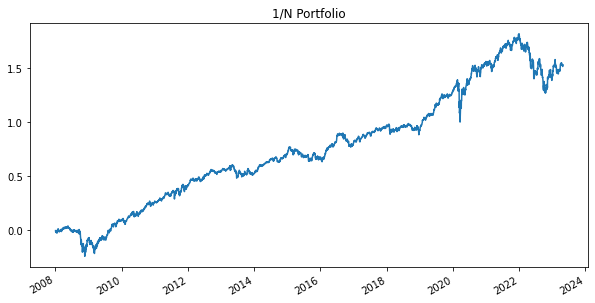

In [63]:
naive_portfolio = dp.scale_vol((close_asset_returns.shift(-1) / len(close_asset_returns.columns)).sum(1).loc[dt.date(2008, 1, 1):])
plt.figure(figsize=(10,5))
pt.cumulative_returns(naive_portfolio).plot(title='1/N Portfolio')

In [56]:
pt.performance_summary(raw_rets), pt.performance_summary(risk_parity_rets), pt.performance_summary(naive_portfolio)
pt.performance_summary(pd.concat([raw_rets, risk_parity_rets, naive_portfolio], axis=1))

,ATR Risk Parity Performance Summary,Variance Risk Parity Performance Summary,0 Performance Summary
Sharpe Ratio,0.517,0.660,0.658
Drift Adjusted Sharpe Ratio,0.042,0.142,0.311
CAGR,0.048,0.063,0.063
Vol,0.100,0.100,0.100
Sortino Ratio,0.701,0.758,0.820
Martin (Ulcer) Ratio,0.472,1.441,1.196
Omega Ratio,0.971,0.996,0.996
RR Ratio,1.098,1.175,1.138
Win Rate,0.532,0.551,0.550
Skew,-0.043,0.338,-0.060


In [57]:
pt.performance_summary(pd.concat([np.log(1+raw_rets), np.log(1+risk_parity_rets), np.log(1+naive_portfolio)], axis=1))

,ATR Risk Parity Performance Summary,Variance Risk Parity Performance Summary,0 Performance Summary
Sharpe Ratio,0.467,0.610,0.607
Drift Adjusted Sharpe Ratio,0.034,0.140,0.297
CAGR,0.042,0.058,0.058
Vol,0.100,0.100,0.100
Sortino Ratio,0.626,0.690,0.747
Martin (Ulcer) Ratio,0.393,1.199,1.033
Omega Ratio,0.963,0.984,0.986
RR Ratio,1.088,1.161,1.127
Win Rate,0.532,0.551,0.550
Skew,-0.129,0.113,-0.191
